In [132]:
#Import needed library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

1. Load & describe the dataset

In [167]:
# Source of data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
data_path = "https://raw.githubusercontent.com/giangtran317/EDA/main/housing_price/train.csv"

In [168]:
df = pd.read_csv(data_path)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [169]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


2. Fill the mising entries

In [170]:
#calculate null ratio 
df_na = df.isnull().sum()/len(df)
df_na[df_na>0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [171]:
#drop columns have null ratio >0.8 & FireplaceQu
df = df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)

In [172]:
df_na = df.isnull().sum()/len(df)
df_na[df_na>0]
# na_columns = df_na.columns

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [173]:
df_na[df_na>0].index.to_numpy()

array(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'], dtype=object)

In [174]:
#fill null value = mode
for cols in df_na[df_na>0].index.to_numpy():
    df[cols] = df[cols].fillna(df[cols].mode()[0])

3. Handle categorical columns by one-hot encoding

In [175]:
#Identify numerical columns 
df_numerical = df._get_numeric_data()
df_numerical.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [176]:
#Identify categorical columns
categorical_columns = set(df.columns) - set(df_numerical)
df[categorical_columns].head(2)

,KitchenQual,GarageQual,CentralAir,GarageCond,Utilities,BsmtExposure,SaleCondition,Exterior1st,HouseStyle,LotConfig,...,BldgType,Street,Heating,LotShape,SaleType,ExterQual,PavedDrive,Condition1,RoofMatl,GarageType
0,Gd,TA,Y,TA,AllPub,No,Normal,VinylSd,2Story,Inside,...,1Fam,Pave,GasA,Reg,WD,Gd,Y,Norm,CompShg,Attchd
1,TA,TA,Y,TA,AllPub,Gd,Normal,MetalSd,1Story,FR2,...,1Fam,Pave,GasA,Reg,WD,TA,Y,Feedr,CompShg,Attchd


In [177]:
df = pd.get_dummies(df, columns=categorical_columns)
df.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,1,0,0,0,0


4. Remove outlier

In [178]:
df_numerical = df_numerical.drop(['Id'], axis=1)
df_numerical_cols = df_numerical.columns 
df_numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

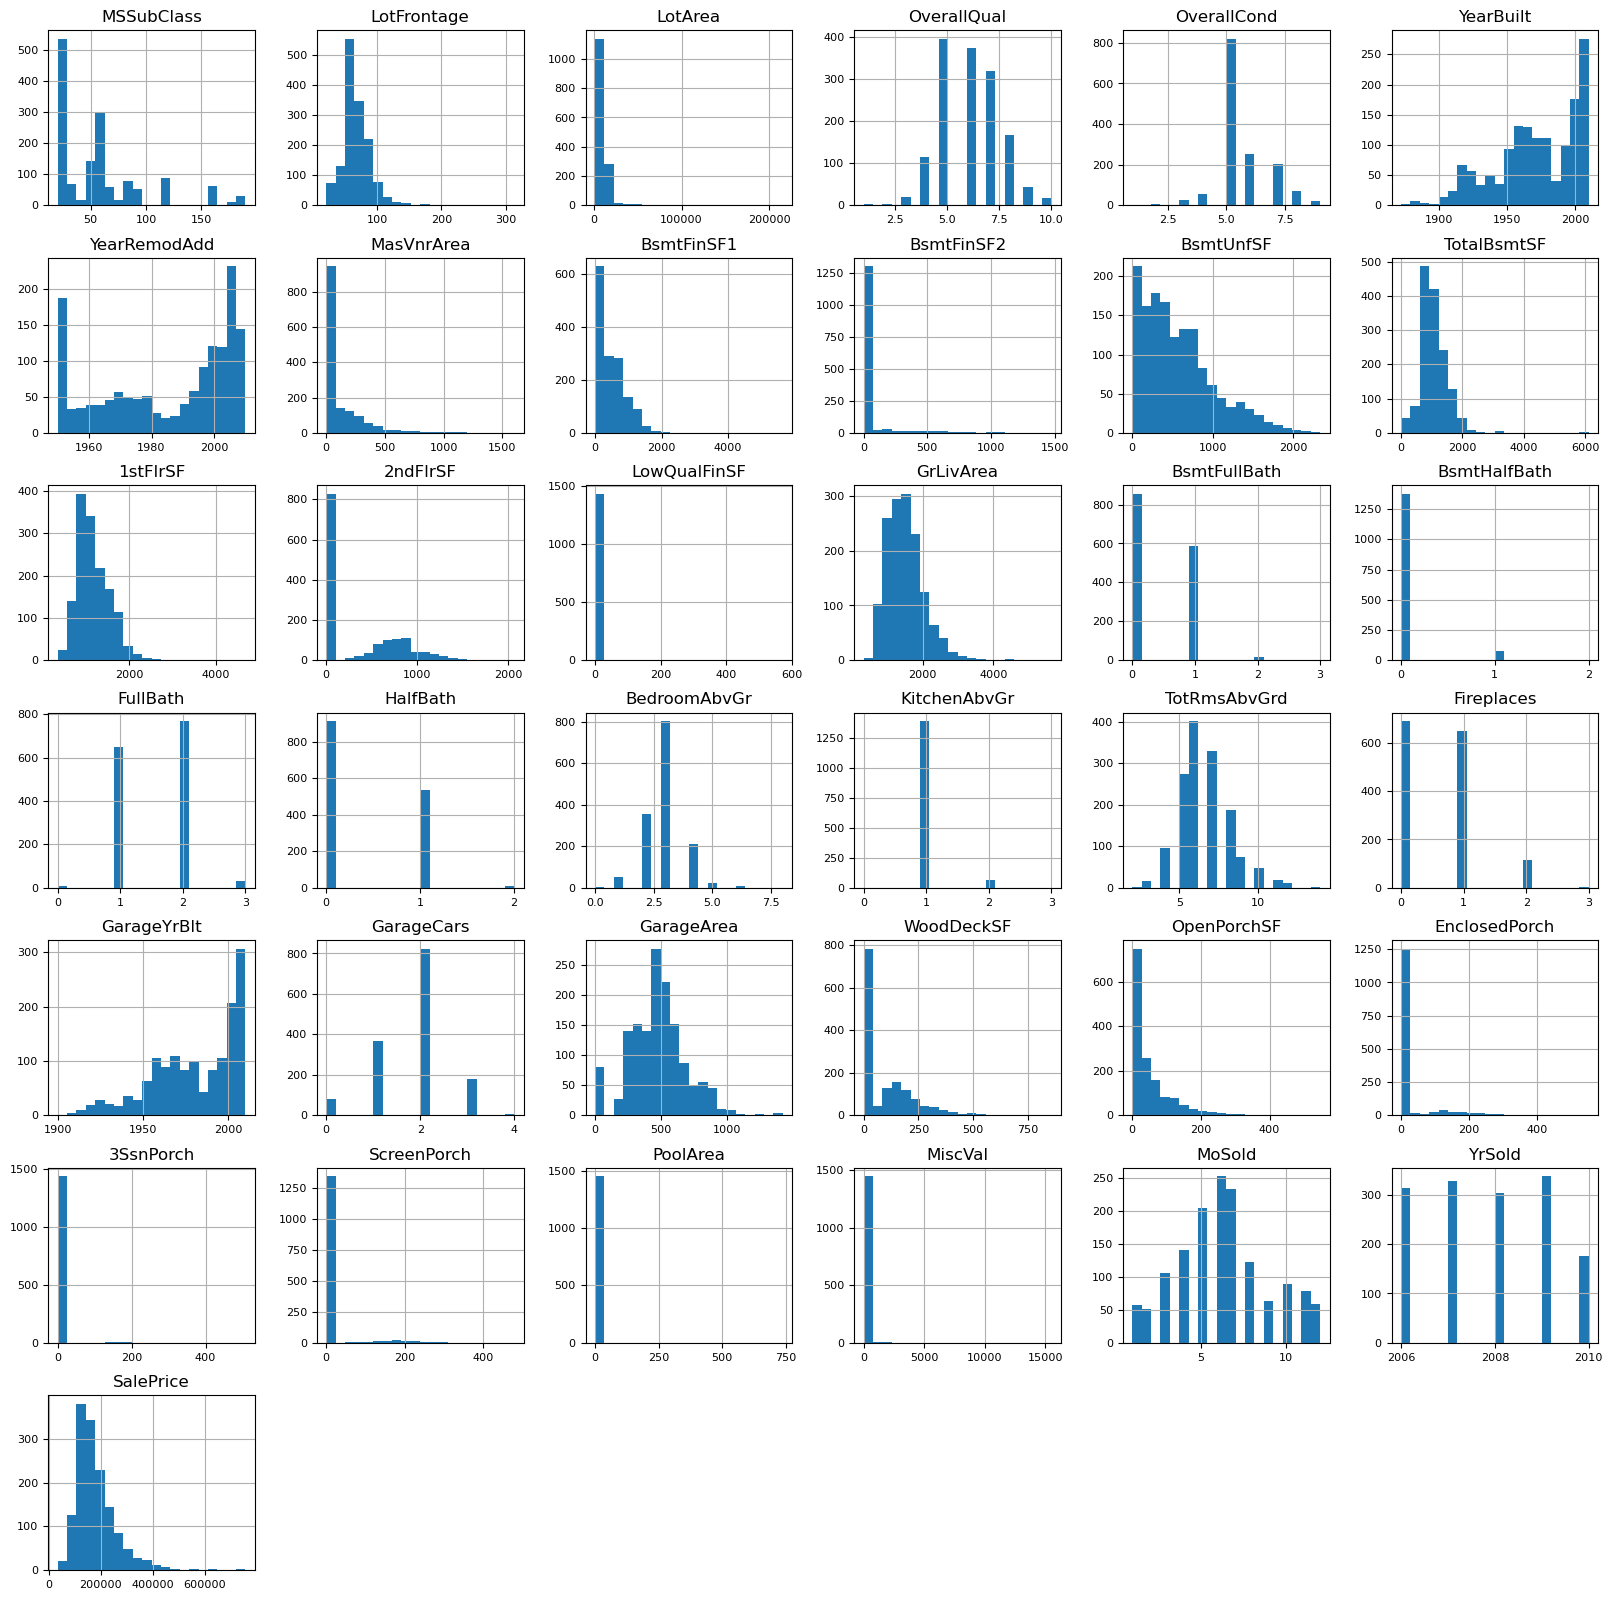

In [186]:
df_numerical.hist(figsize=(20, 20), bins=20, xlabelsize=8, ylabelsize=8);

''

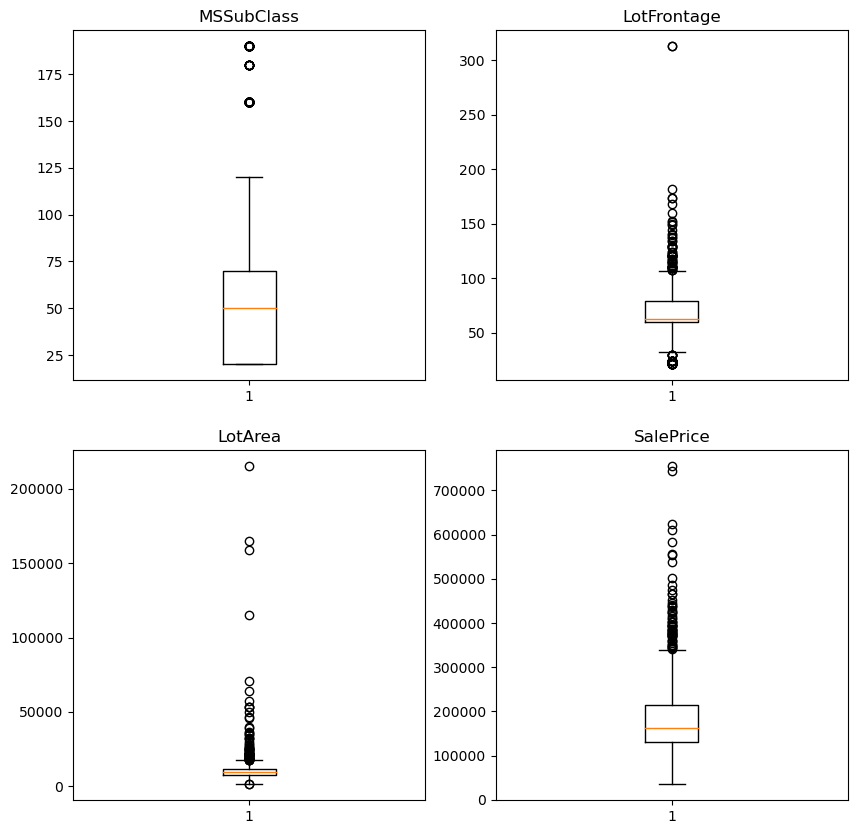

In [179]:
#Plot distribution of numeric variables: demo 4 columns
figure, axis = plt.subplots(2, 2, figsize=(10, 10))

axis[0, 0].boxplot(df_numerical['MSSubClass'])
axis[0, 0].set_title("MSSubClass")
  
axis[0, 1].boxplot(df_numerical['LotFrontage'])
axis[0, 1].set_title("LotFrontage")
  
axis[1, 0].boxplot(df_numerical['LotArea'])
axis[1, 0].set_title("LotArea")
  
axis[1, 1].boxplot(df_numerical['SalePrice'])
axis[1, 1].set_title("SalePrice")
;

In [181]:
#Remove the outliers having z-score >=3 
for cols in df_numerical_cols:
    df = df[(np.abs(stats.zscore(df[cols])) < 3)]

5. Some visualizations

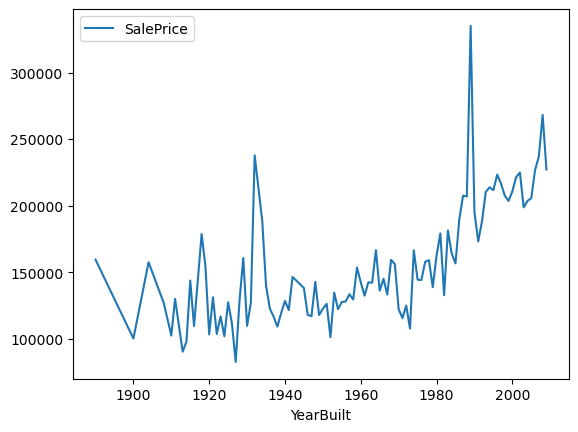

In [187]:
#Trend of house price over years
SalePrice_byYear = df[['YearBuilt','SalePrice']].groupby('YearBuilt').mean()
SalePrice_byYear.plot.line();

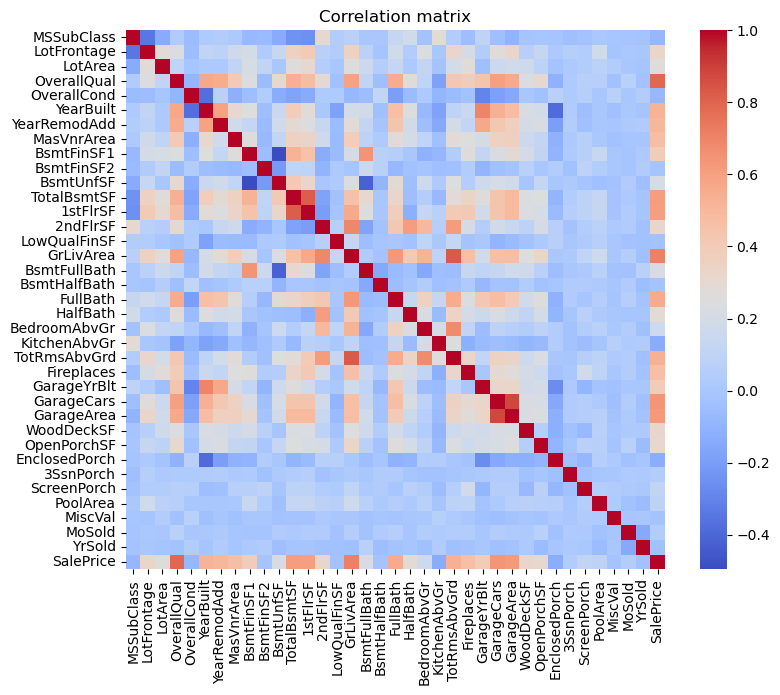

In [190]:
# Calculate correlation matrix
corr_matrix = df_numerical.corr()

# Create heatmap using pandas
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True)
plt.title("Correlation matrix")
plt.show()

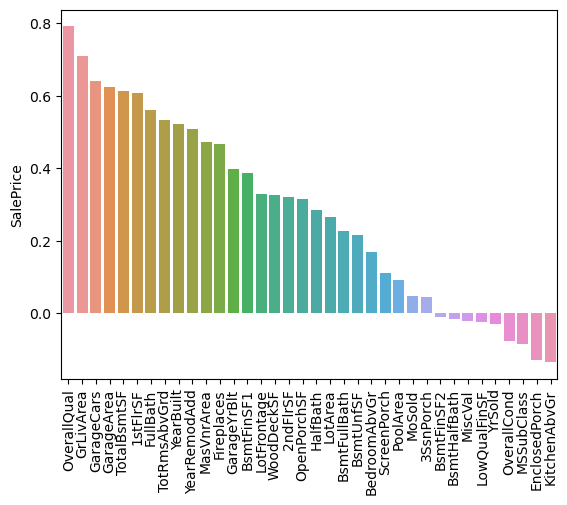

In [197]:
#Visualize corr by bar chart for choosing key features
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)[1:]
sns.barplot(x=corr_with_target.index, y=corr_with_target)
plt.xticks(rotation=90);

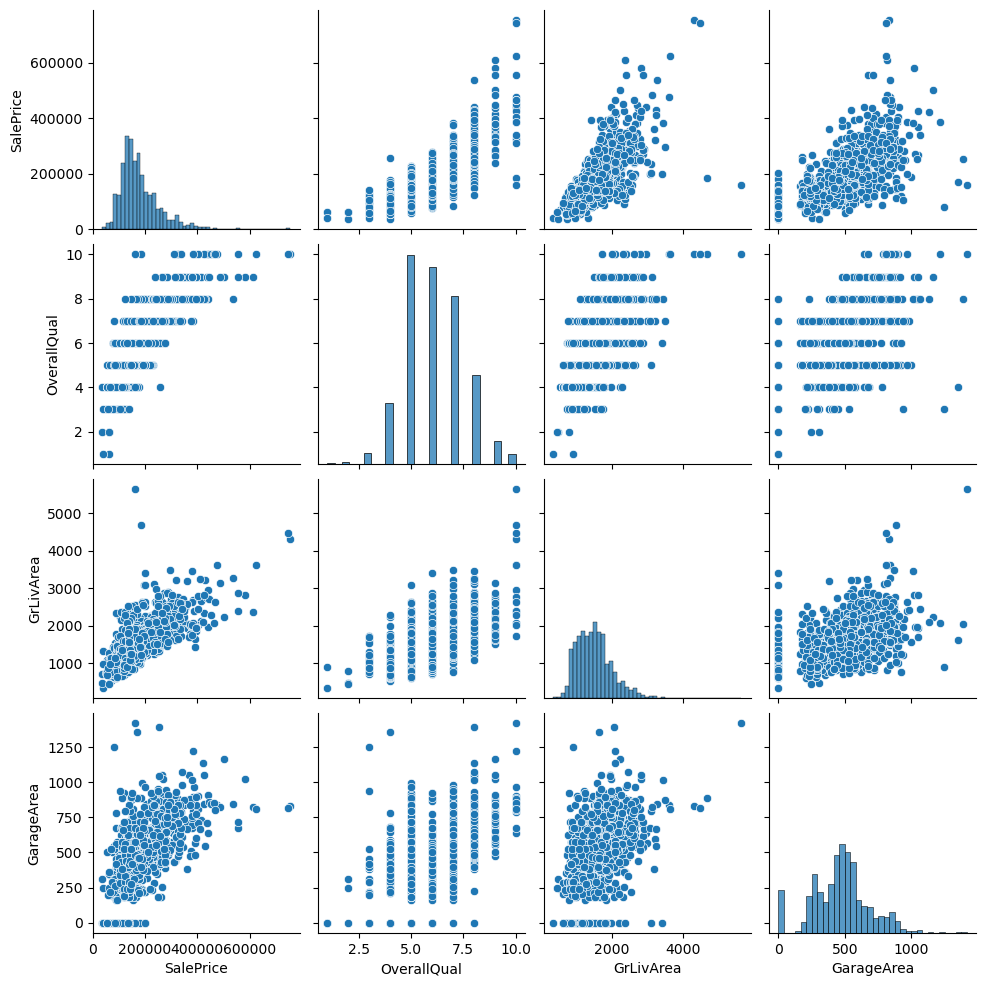

In [200]:
#Plot correlation of SalePrice with some key features: OverallQual, GrLivArea, GarageArea
sns.pairplot(df_numerical, vars=["SalePrice", "OverallQual", "GrLivArea", "GarageArea"]);